In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb


In [60]:
metaverse_df = pd.read_csv('metaverse_transactions_dataset.csv')

metaverse_df.loc[metaverse_df['anomaly'] == 'low_risk'].describe()

,hour_of_day,amount,ip_prefix,login_frequency,session_duration,risk_score
count,63494.000000,63494.000000,63494.000000,63494.000000,63494.000000,63494.000000
mean,12.134564,486.214159,147.483633,4.102844,67.574133,36.274932
std,6.752026,238.435717,69.496558,2.235481,38.166378,11.834191
min,0.000000,0.010000,10.000000,1.000000,20.000000,15.000000
25%,7.000000,322.274832,172.000000,2.000000,36.000000,26.250000
50%,12.000000,486.027151,172.160000,4.000000,59.000000,35.437500
75%,18.000000,642.844896,192.000000,6.000000,89.000000,49.612500
max,23.000000,1557.150905,192.168000,8.000000,159.000000,59.062500


In [61]:
metaverse_df.loc[metaverse_df['anomaly'] == 'moderate_risk'].describe()

,hour_of_day,amount,ip_prefix,login_frequency,session_duration,risk_score
count,8611.000000,8611.000000,8611.000000,8611.000000,8611.000000,8611.000000
mean,7.012426,628.659679,147.530346,6.757984,115.584601,69.200427
std,6.554707,265.112407,69.466905,1.399089,29.400959,6.774497
min,0.000000,0.010000,10.000000,1.000000,20.000000,62.500000
25%,2.000000,436.382685,172.000000,6.000000,97.000000,62.500000
50%,5.000000,701.855115,172.160000,7.000000,118.000000,67.500000
75%,11.000000,817.607786,192.000000,8.000000,139.000000,70.875000
max,23.000000,1485.989339,192.168000,8.000000,159.000000,84.375000


In [62]:
metaverse_df.loc[metaverse_df['anomaly'] == 'high_risk'].describe()

,hour_of_day,amount,ip_prefix,login_frequency,session_duration,risk_score
count,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000
mean,11.641109,495.352890,149.367603,1.500693,29.462510,97.686374
std,6.992830,243.012623,68.200001,0.500038,5.747063,3.422143
min,0.000000,0.010000,10.000000,1.000000,20.000000,90.000000
25%,6.000000,324.003988,172.000000,1.000000,24.000000,94.500000
50%,12.000000,491.667467,172.160000,2.000000,30.000000,100.000000
75%,18.000000,660.679840,192.000000,2.000000,34.000000,100.000000
max,23.000000,1393.027468,192.168000,2.000000,39.000000,100.000000


In [63]:
metaverse_df = pd.read_csv('metaverse_transactions_dataset.csv')

# Drop unnecessary columns
drop_columns = ['timestamp', 'sending_address', 'receiving_address','risk_score','transaction_type']
metaverse_df = metaverse_df.drop(drop_columns, axis=1)
metaverse_df['anomaly'] = metaverse_df['anomaly'].replace({'moderate_risk': 'low_risk'})


In [64]:
metaverse_df['anomaly'].value_counts()

anomaly
low_risk     72105
high_risk     6495
Name: count, dtype: int64

In [65]:
object_columns = ['location_region', 'purchase_pattern', 'age_group']
for col in object_columns:
    le = LabelEncoder()
    metaverse_df[col] = le.fit_transform(metaverse_df[col])

    # Encode the target variable
le_target = LabelEncoder()
metaverse_df['anomaly'] = le_target.fit_transform(metaverse_df['anomaly'])


# Define features and target
X = metaverse_df.drop('anomaly', axis=1)
y = metaverse_df['anomaly']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
X

,hour_of_day,amount,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group
0,12,796.949206,2,192.000,3,48,0,0
1,19,0.010000,4,172.000,5,61,0,0
2,16,778.197390,1,192.168,3,74,0,0
3,9,300.838358,4,172.000,8,111,1,2
4,14,775.569344,0,172.160,6,100,1,2
...,...,...,...,...,...,...,...,...
78595,12,660.280373,0,172.000,1,27,2,1
78596,16,310.273397,0,172.000,5,60,0,0
78597,16,624.674332,0,192.000,1,34,2,1
78598,4,401.391592,1,192.168,4,56,0,0


In [67]:
X_test.shape

(15720, 8)

/Users/pranavsekhar/miniconda3/envs/prw1/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


RandomForest - Accuracy: 0.9120229007633588
Confusion Matrix:
[[   68  1183]
 [  200 14269]]
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.05      0.09      1251
           1       0.92      0.99      0.95     14469

    accuracy                           0.91     15720
   macro avg       0.59      0.52      0.52     15720
weighted avg       0.87      0.91      0.89     15720

Top Features for RandomForest:
+------------------+--------------+
| Feature          |   Importance |
+==================+==============+
| amount           |    0.361281  |
+------------------+--------------+
| session_duration |    0.235198  |
+------------------+--------------+
| hour_of_day      |    0.172229  |
+------------------+--------------+
| login_frequency  |    0.0735489 |
+------------------+--------------+
| location_region  |    0.0557398 |
+------------------+--------------+
| ip_prefix        |    0.0512114 |
+------------------+--

/Users/pranavsekhar/miniconda3/envs/prw1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pranavsekhar/miniconda3/envs/prw1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pranavsekhar/miniconda3/envs/prw1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

LogisticRegression - Accuracy: 0.9204198473282442
Confusion Matrix:
[[    0  1251]
 [    0 14469]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1251
           1       0.92      1.00      0.96     14469

    accuracy                           0.92     15720
   macro avg       0.46      0.50      0.48     15720
weighted avg       0.85      0.92      0.88     15720

Top Features for LogisticRegression:
+------------------+--------------+
| Feature          |   Importance |
+==================+==============+
| purchase_pattern |  7.26304     |
+------------------+--------------+
| age_group        |  2.06315     |
+------------------+--------------+
| login_frequency  |  0.0770774   |
+------------------+--------------+
| session_duration |  0.00950034  |
+------------------+--------------+
| hour_of_day      |  0.0050712   |
+------------------+--------------+
| location_region  |  0.00137117  |
+---------

/Users/pranavsekhar/miniconda3/envs/prw1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pranavsekhar/miniconda3/envs/prw1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pranavsekhar/miniconda3/envs/prw1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

SVC - Accuracy: 0.9204198473282442
Confusion Matrix:
[[    0  1251]
 [    0 14469]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1251
           1       0.92      1.00      0.96     14469

    accuracy                           0.92     15720
   macro avg       0.46      0.50      0.48     15720
weighted avg       0.85      0.92      0.88     15720

DecisionTree - Accuracy: 0.8765267175572519
Confusion Matrix:
[[  318   933]
 [ 1008 13461]]
Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.25      0.25      1251
           1       0.94      0.93      0.93     14469

    accuracy                           0.88     15720
   macro avg       0.59      0.59      0.59     15720
weighted avg       0.88      0.88      0.88     15720

Top Features for DecisionTree:
+------------------+--------------+
| Feature          |   Importance |
+==================+

/Users/pranavsekhar/miniconda3/envs/prw1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pranavsekhar/miniconda3/envs/prw1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pranavsekhar/miniconda3/envs/prw1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

AdaBoost - Accuracy: 0.9204198473282442
Confusion Matrix:
[[    0  1251]
 [    0 14469]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1251
           1       0.92      1.00      0.96     14469

    accuracy                           0.92     15720
   macro avg       0.46      0.50      0.48     15720
weighted avg       0.85      0.92      0.88     15720

Top Features for AdaBoost:
+------------------+--------------+
| Feature          |   Importance |
+==================+==============+
| amount           |         0.72 |
+------------------+--------------+
| hour_of_day      |         0.1  |
+------------------+--------------+
| session_duration |         0.08 |
+------------------+--------------+
| location_region  |         0.04 |
+------------------+--------------+
| ip_prefix        |         0.04 |
+------------------+--------------+
| purchase_pattern |         0.02 |
+------------------+----------

/Users/pranavsekhar/miniconda3/envs/prw1/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/pranavsekhar/miniconda3/envs/prw1/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/pranavsekhar/miniconda3/envs/prw1/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/pranavsekhar/miniconda3/envs/prw1/lib/python3.9/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

XGB - Accuracy: 0.9181297709923664
Confusion Matrix:
[[   16  1235]
 [   52 14417]]
Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.01      0.02      1251
           1       0.92      1.00      0.96     14469

    accuracy                           0.92     15720
   macro avg       0.58      0.50      0.49     15720
weighted avg       0.87      0.92      0.88     15720

Top Features for XGB:
+------------------+--------------+
| Feature          |   Importance |
+==================+==============+
| login_frequency  |    0.934261  |
+------------------+--------------+
| amount           |    0.014489  |
+------------------+--------------+
| hour_of_day      |    0.0132434 |
+------------------+--------------+
| ip_prefix        |    0.0131748 |
+------------------+--------------+
| location_region  |    0.012602  |
+------------------+--------------+
| session_duration |    0.0122302 |
+------------------+--------------+
| pu

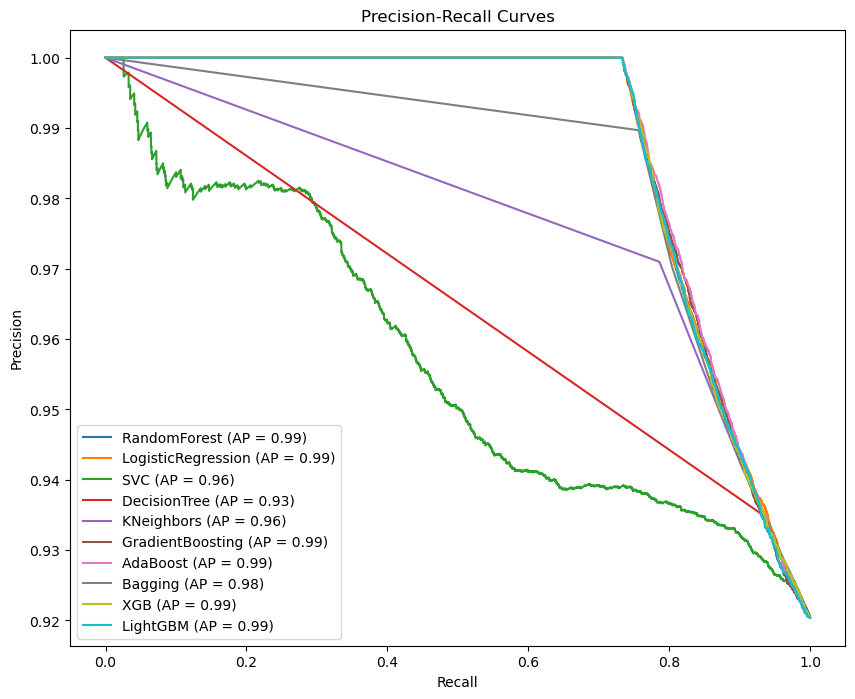

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
from tabulate import tabulate  # Move this import to the top

# Define the models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVC': SVC(decision_function_shape='ovo', probability=True),  # Ensure probability is True for Precision-Recall curve
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNeighbors': KNeighborsClassifier(),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'XGB': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': lgb.LGBMClassifier(learning_rate=0.01, n_estimators=100, random_state=42)
}

fig, ax = plt.subplots(figsize=(10, 8))

# Assuming X_train is a pandas DataFrame for simplicity in referencing columns
feature_names = X_train.columns

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

    # Check if model has feature_importances_ or coef_ attributes
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        feature_importances = abs(model.coef_[0])  # Use absolute values for coefficients
    else:
        feature_importances = None

    if feature_importances is not None:
        table_data = list(zip(feature_names, feature_importances))
        table_data_sorted = sorted(table_data, key=lambda x: x[1], reverse=True)
        print(f"Top Features for {name}:")
        print(tabulate(table_data_sorted, headers=['Feature', 'Importance'], tablefmt='grid'))
    
    # Compute Precision-Recall curve and AUC
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]  # probability estimates for the positive class
    elif hasattr(model, "decision_function"):
        y_probs = model.decision_function(X_test)
        y_probs = (y_probs - y_probs.min()) / (y_probs.max() - y_probs.min())  # Scale to [0,1]
    else:
        continue  # Skip plotting for models that do not support probabilities or decision function
    
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    avg_prec = average_precision_score(y_test, y_probs)
    ax.plot(recall, precision, label=f'{name} (AP = {avg_prec:.2f})')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curves')
ax.legend(loc='best')

plt.show()
